### HBAI savings
Studies savings among low-income vs non Low income groups and observe the change over time.



In [9]:
import pandas as pd

import plotly.express as px
import sys



def read_csv(data_file):

    # Read the CSV file, skipping the first row (header row) and unnecessary footer rows
    df = pd.read_csv(data_file, skiprows=1, skipfooter=0, engine='python')

    # Drop empty columns and rows
    df = df.dropna(how='all', axis=1).dropna(how='all', axis=0)
    # Extract the year column and clean it
    df['Financial Year'] = df['Financial Year'].str.extract(r'(\d{4}-\d{2})')
    df = df.dropna(subset=['Financial Year'])
    # Set the year as the index
    df.set_index('Financial Year', inplace=True)

    # extract data columns.
    total_col_index = df.columns.str.contains('Total').argmax()

    #print(total_col_index)
    not_low_income = df.iloc[:, :total_col_index+1].add_suffix('-not low income')

    # clean up the duplcated 1. 2. column names
    df.columns = df.columns.str.replace(r'\.\d+$', '', regex=True)
    
    low_income = df.iloc[:, total_col_index + 1: total_col_index *2+2 ].add_suffix('-low income')

    #print(low_income)
    total_columns = df.iloc[:, total_col_index *2 +3:].add_suffix('-total')

    # Combine the two groups of columns
    result = pd.concat([not_low_income, low_income, total_columns], axis=1)

    

    # Save or display the resulting DataFrame
    #print(result.head())  # Display the first few rows
    result.to_csv(data_file+"_processed.csv")  # Save to a new CSV file
    #print(df.head())
    #print("----")    

    # convert to numbers
    result = result.apply(pd.to_numeric, errors='coerce')
    #print(result.head(10))
    return result, low_income.columns






In [10]:

BHC, savings=read_csv("./HBAI-BHC-saving.csv")

In [11]:
savings_categories=list(savings.str.replace('-low income',''))

savings_categories

['No savings',
 'Less than £1,500',
 '£1,500 but less than £3,000',
 '£3,000 but less than £8,000',
 '£8,000 but less than £10,000',
 '£10,000 but less than £16,000',
 '£16,000 but less than £20,000',
 '£20,000 or more',
 'Total']

In [12]:
def extract_and_fix_year(year_range):
    try:
        year_suffix = year_range.split('-')[1]
        full_year = "20" + year_suffix  if int(year_suffix) < 50 else "19" +year_suffix
        return int(full_year) 
    except:
        return None
    
def plot_hbai_trends(bhc_df, savings_categories, islowincome=True):

    suffix="-low income" if islowincome else "-not low income"
    income_level_desc = " Low income" if islowincome else " Not low income"
    # Calculate the impact (AHC - BHC) for each region
    for cat in savings_categories:
        #print(cat)
        #bhc_df[f'{cat} pct'] = ((bhc_df[f'{cat}{suffix}']/bhc_df[f'{cat}-total'])*100)
        bhc_df[f'{cat} pct'] = ((bhc_df[f'{cat}{suffix}']/bhc_df[f'Total{suffix}'])*100)


    cat_cols = [f'{cat} pct' for cat in savings_categories]
    bhc_df=bhc_df.reset_index()
    # Melt the data to long format for easier plotting (if needed)
    impact_data = bhc_df.melt(
        id_vars=['Financial Year'],
        value_vars=cat_cols,
        var_name='Savings',
        value_name='Savings categories'
    )
    impact_data['Financial Year'] = impact_data['Financial Year'].apply(extract_and_fix_year)

    print(impact_data)
    # Create the line chart
    fig = px.line(impact_data, 
                x='Financial Year', 
                y='Savings categories', 
                color='Savings',
                title=f'Savings of {income_level_desc} Populations  BHC , 1994-2023',
                labels={'Savings categories': 'Amount of savings', 'Financial Year': 'Year'},
                hover_data=['Savings'], width=1200, height=600)

    # Customize the layout (optional)
    fig.update_layout(
        xaxis_title="Year",
        yaxis_title=f"Pct of {income_level_desc} population with savings",
        legend_title="Savings",
        hovermode="x unified"  # Shows data for all regions at a given year
    )
    #fig.add_annotation(
    #    text="Note: percentage is calculated by (low income BHC in region-low income AHC in region)/total BHC in region.",
    #    xref="paper", yref="paper",  # Relative to the entire plot
    #    x=0.5, y=-0.2,  # Position below the plot
    #    showarrow=False,
    #    font=dict(size=12, color="gray")
    #)

    # Show the plot
    fig.show()
    #fig.write_html("savings_of_hbai_bhc.html")
    
    import plotly.io as pio
    pio.write_image(fig, 'chart.png')  # Save the figure as an image

    from IPython.display import display, Image
    display(Image(filename='chart.png'))





     Financial Year              Savings  Savings categories
0              1995       No savings pct           56.535217
1              1996       No savings pct           58.441240
2              1997       No savings pct           57.657053
3              1998       No savings pct           57.394117
4              1999       No savings pct           56.607639
..              ...                  ...                 ...
227            2019  £20,000 or more pct           11.995876
228            2020  £20,000 or more pct           12.107126
229            2021  £20,000 or more pct                 NaN
230            2022  £20,000 or more pct           12.003169
231            2023  £20,000 or more pct           13.415221

[232 rows x 3 columns]


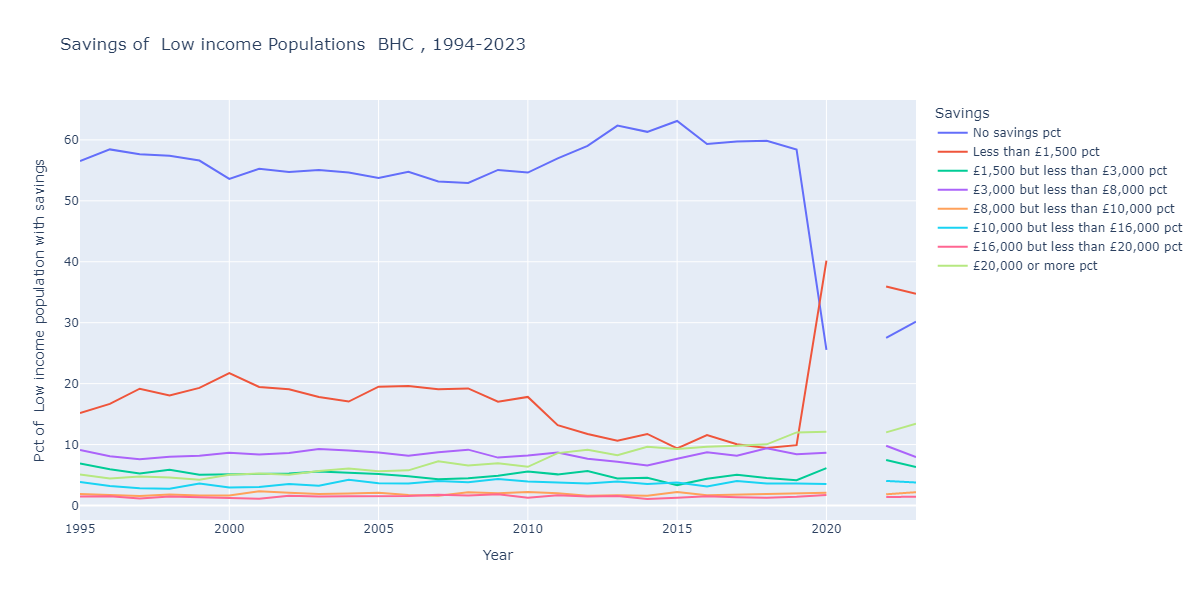

In [13]:
savings_categories.remove("Total") if "Total" in savings_categories else None
plot_hbai_trends(BHC, savings_categories, True)


     Financial Year              Savings  Savings categories
0              1995       No savings pct           28.711906
1              1996       No savings pct           30.842440
2              1997       No savings pct           27.702163
3              1998       No savings pct           27.791956
4              1999       No savings pct           26.942486
..              ...                  ...                 ...
227            2019  £20,000 or more pct           20.095491
228            2020  £20,000 or more pct           22.360551
229            2021  £20,000 or more pct                 NaN
230            2022  £20,000 or more pct           24.317262
231            2023  £20,000 or more pct           24.919778

[232 rows x 3 columns]


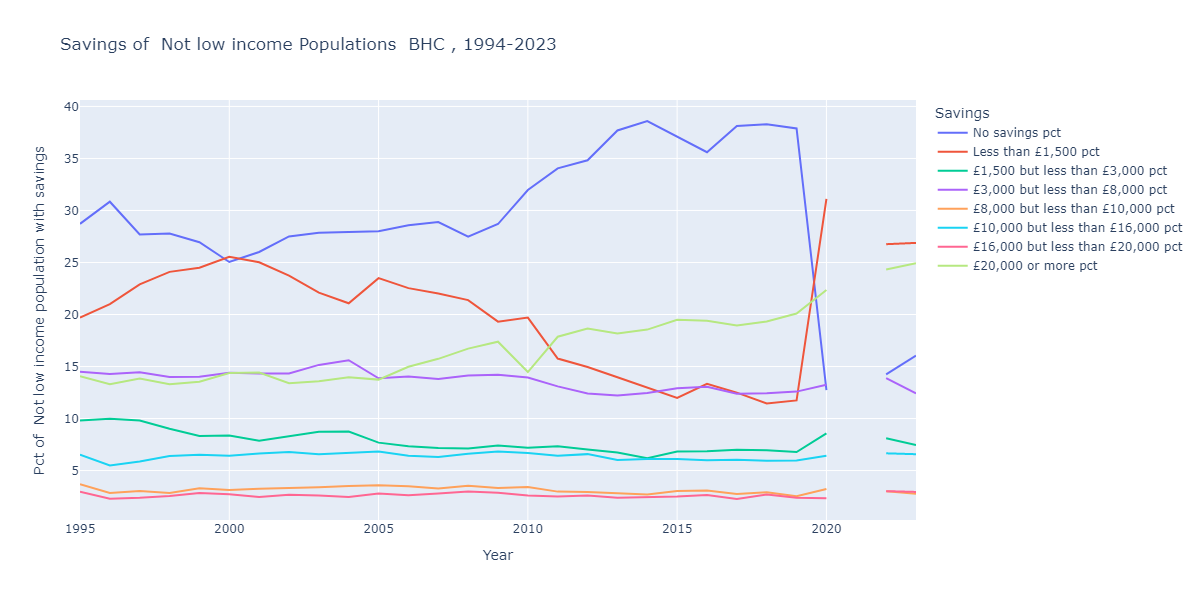

In [14]:
plot_hbai_trends(BHC, savings_categories, False)

### Observations
The percentage of the higher-income population with no saving generally increases over the years, with the exception of the year 2020.  This is likely due to government's intervention during COVID period.  Lockdowns kept people at home and reduced their spendings.
However, the general trend is still concerning, as these population would not be able to cushion shocks when the economy takes a downturn or when there are changes in their circumstances due to unfortunate events like accidents or sickness.  In such events, they would again rely on government's spendings. 

